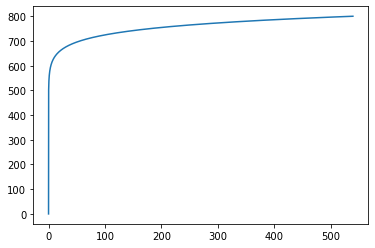

In [13]:
import os
import cv2
import sys
from scipy import io
import pandas as pd
from scipy.spatial import distance
import numpy as np
import math
import matplotlib.pyplot as plt
import glob
import fracture
import DIC as dic

"""
#mat save code
exx = handles_ncorr.data_dic.strains.plot_exx_cur_formatted
eyy = handles_ncorr.data_dic.strains.plot_eyy_cur_formatted
exy = handles_ncorr.data_dic.strains.plot_exy_cur_formatted
uu = handles_ncorr.data_dic.displacements.plot_u_cur_formatted
vv = handles_ncorr.data_dic.displacements.plot_v_cur_formatted

save t_exx.mat exx
save t_exy.mat exy
save t_eyy.mat eyy
save t_uu.mat uu
save t_vv.mat vv

"""
path = r'E:\experiment data\aluminum\2021-03-19\2_1resoltech\analysis\DIC'
file_num = '4048'

# Material property
n_hardening=17
yield_strength=535.435
poisson_ratio=0.33
alpha=0.585
In=2.78
youngs_modulus=71.7*1000
fracture_strength = 800

# Img parameter
set_angle = 60
down_level, up_level = 10,13
ratio = 2/60
left, right, up_down = 50,250,150

strength_list = np.arange(0,fracture_strength+0.1,0.1)
effective_strain_list = strength_list / youngs_modulus + alpha*(strength_list/yield_strength)**n_hardening

plt.plot(effective_strain_list,strength_list)


In [ ]:
uu = io.loadmat(path+'/'+file_num+'/t_uu.mat')['uu']
vv = io.loadmat(path+'/'+file_num+'/t_vv.mat')['vv']
exx = io.loadmat(path+'/'+file_num+'/t_exx.mat')['exx']
eyy = io.loadmat(path+'/'+file_num+'/t_eyy.mat')['eyy']
exy = io.loadmat(path+'/'+file_num+'/t_exy.mat')['exy']
ee = fracture.effective_strain(exx, eyy, exy)
ee = dic.find_zone(ee)

crack_tip = [18,106] #xy
left, right, hight,crack_gap =5, 50 , 50,15
tau1 = ee[crack_tip[1]+crack_gap:crack_tip[1]+hight,crack_tip[0]-left]
tau2 = ee[crack_tip[1]+hight, crack_tip[0]-left:crack_tip[0]+right]
tau3 = ee[crack_tip[1]-hight:crack_tip[1]+hight, crack_tip[0]+right]
tau4 = ee[crack_tip[1]-hight, crack_tip[0]-left:crack_tip[0]+right]
tau5 = ee[crack_tip[1]-hight:crack_tip[1]-crack_gap,crack_tip[0]-left]

ee[crack_tip[1]-hight:crack_tip[1]-crack_gap,crack_tip[0]-left] = 0
ee[crack_tip[1]+crack_gap:crack_tip[1]+hight,crack_tip[0]-left] = 0
ee[crack_tip[1]-hight, crack_tip[0]-left:crack_tip[0]+right] = 0
ee[crack_tip[1]-hight:crack_tip[1]+hight, crack_tip[0]+right] = 0
ee[crack_tip[1]+hight, crack_tip[0]-left:crack_tip[0]+right] = 0

plt.imshow(ee)
plt.scatter(crack_tip[0],crack_tip[1], color='red')
plt.show()